In [ ]:
!pip install pytrends
# source: https://medium.com/the-data-science-publication/how-to-use-the-pytrends-api-to-get-google-trends-data-4378acbaaa8a
# motivation: https://tradingstrategyguides.com/google-trends-trading-strategies/

In [ ]:
# import the TrendReq method from the pytrends request module
from pytrends.request import TrendReq

# execute the TrendReq method by passing the host language (hl) and timezone (tz) parameters
pytrends = TrendReq(hl='en-US', tz=360)

In [ ]:
# build list of keywords
kw_list = ["Debt", "Stocks", "Portfolio"] 

# build the payload
pytrends.build_payload(kw_list, timeframe='2007-01-01 2021-01-01', geo='US')

In [ ]:
# import pandas module
import pandas as pd

# store interest over time information in df
df = pytrends.interest_over_time()

# display the top 20 rows in dataframe
print(df.head(5))

            Debt  Stocks  Portfolio  isPartial
date                                          
2007-01-01    28      27         12      False
2007-02-01    26      29         15      False
2007-03-01    26      28         13      False
2007-04-01    29      26         15      False
2007-05-01    28      25         14      False


In [ ]:
!pip install matplotlib

<Figure size 432x288 with 0 Axes>

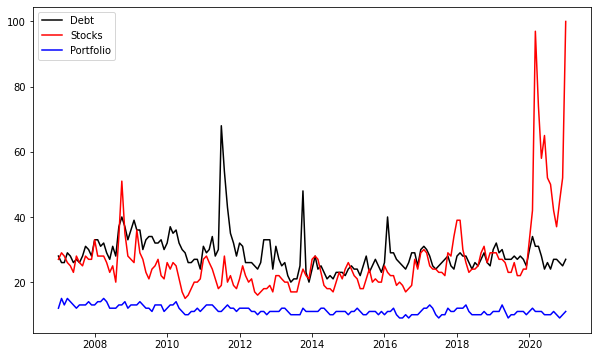

In [ ]:
# import matplotlib plotting module to visualize data (make sure matplotlib is installed using pip)
import matplotlib.pyplot as plt

# plot all three trends in same chart
plt.figure()
plt.subplots(figsize=(10, 6))

plt.plot(df.index,df.Debt,'k',linestyle="-")
plt.plot(df.index,df.Stocks,'r',linestyle="-")
plt.plot(df.index,df.Portfolio,'b',linestyle="-")
plt.legend(["Debt", "Stocks", "Portfolio"])
plt.show()

In [ ]:
d1='2007-01-01'
d2='2021-01-01'
data = yf.download(tickers="^GSPC", start=d1, end=d2)

[*********************100%***********************]  1 of 1 downloaded


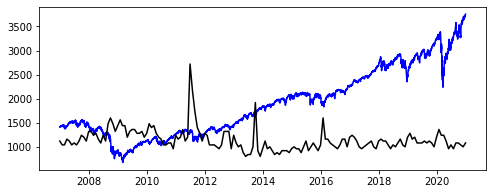

In [ ]:
plt.subplots(figsize=(8, 3))
plt.plot(data.index,data['Adj Close']	,'b',linestyle="-")
plt.plot(df.index,40*df.Debt,'k',linestyle="-")

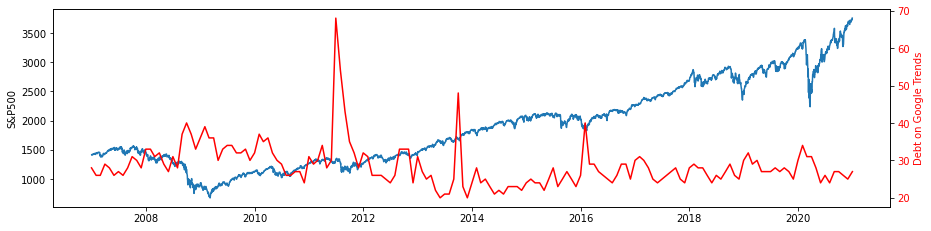

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
#https://kitchingroup.cheme.cmu.edu/blog/2013/09/13/Plotting-two-datasets-with-very-different-scales/
x1 = data.index
x2 = df.index
y1 = data['Adj Close']
y2 = df.Debt

fig = plt.figure(figsize=(15, 8))
ax1 = fig.add_subplot(211)

ax1.plot(x1, y1)
ax1.set_ylabel('S&P500')

ax2 = ax1.twinx()
ax2.plot(x2, y2, 'r-')
ax2.set_ylabel('Debt on Google Trends', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')

